In [289]:
# Bruno Ugolini

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import json

# 1. Bisection


One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower, upper, tol)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [291]:
def bisect(f, lower, upper, tol):
    """
    Perform a bisection procedure for
    root finding.
    
    Inputs:
    f: the given function
    lower: the lower bound for x
    upper: the upper bound for x
    tol: the tolerance for step size
    
    Outputs:
    res: the x-value at the root
    """
    
    x_low = lower # set initial x-low
    x_hgh = upper # set initial x-high
    
    step_size = (upper - lower) / 2.
    
    while step_size >= tol:
        
        step_size = 0.5 * (x_hgh - x_low)
        x_bis = x_low + step_size

        f_b = f(x_bis) # get f at bisector
        f_l = f(x_low) # get f at lower bound
        f_h = f(x_hgh) # get f at upper bound

        if abs(f_b) <= 0.001:
            break
        
        if np.sign(f_b) == np.sign(f_l):
            x_low = x_bis # assign new low value
        else:
            x_hgh = x_bis # assign new high value

    if abs(f_b) > 0.001:
        print(f"The function was not able to find a root within these bounds\nTry another set of bounds")
        print(f"x_bis: {x_bis:0.3f}; f_b:{f_b:0.3f}")
    else:
        print(f"A root exists at {x_bis:.3f} where f(x)={f_b:0.4f}")
    return x_bis

In [292]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1

bisect(f, -10, 10, 0.0001)
print("\n")
bisect(f, -10, 1, 0.0001)
print("\n")
bisect(f, -5, 5, 0.0001)
print("\n")
bisect(f, 0, 2, 0.0001);

A root exists at -1.002 where f(x)=-0.0009


A root exists at -1.002 where f(x)=-0.0001


A root exists at -1.002 where f(x)=-0.0009


A root exists at 0.408 where f(x)=-0.0004


# 1.2 (stretch) Recursive Bisect

Write a recursive version of the bisection algorithm

In [293]:
def recursive_bisect(f, lower, upper, tol):
    """
    Perform a bisection procedure for
    root finding.
    
    Inputs:
    f: the given function
    lower: the lower bound for x
    upper: the upper bound for x
    tol: the tolerance for step size
    
    Outputs:
    res: the x-value at the root
    """
    
    step_size = (upper - lower) / 2.
    x_bis = lower + step_size
    
    f_b = f(x_bis) # get f at bisector
    f_l = f(lower) # get f at lower bound
    f_h = f(upper) # get f at upper bound

    if (abs(f_b) <= 0.001) | (step_size < tol):
        return x_bis
        
    if np.sign(f_b) == np.sign(f_l):
        lower = x_bis # assign new low value
    else:
        upper = x_bis # assign new high value

    return recursive_bisect(f, lower, upper, tol)

In [294]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1

x = recursive_bisect(f, -10, 10, 0.0001)
print(f"Recursive bisect: for x={x:0.3f}, f(x)={f(x):0.4f}.\n")
x = recursive_bisect(f, -10, 1, 0.0001)
print(f"Recursive bisect: for x={x:0.3f}, f(x)={f(x):0.4f}.\n")
x = recursive_bisect(f, -5, 5, 0.0001)
print(f"Recursive bisect: for x={x:0.3f}, f(x)={f(x):0.4f}.\n")
x = recursive_bisect(f, -1.0, 5, 0.0001);
print(f"Recursive bisect: for x={x:0.3f}, f(x)={f(x):0.4f}.\n")

Recursive bisect: for x=-1.002, f(x)=-0.0009.

Recursive bisect: for x=-1.002, f(x)=-0.0001.

Recursive bisect: for x=-1.002, f(x)=-0.0009.

Recursive bisect: for x=0.408, f(x)=0.0006.



# 2.1 Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out

2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.

3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

# Get, Read and Clean Data

In [295]:
# !kaggle datasets download -d rounakbanik/the-movies-dataset

In [296]:
#ratings = pd.read_csv('the-movies-dataset/ratings.csv')
metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv');

D:\Users\Pinhead\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [297]:
# convert budget to floats
metadata['budget'] = metadata['budget'].str.replace("\D+", "").astype(float)
print(f"There are {len(metadata):,} data points.")
print(f"There are {metadata.loc[metadata.budget == 0].budget.count():,} data points where budget == 0.")
print(f"There are {metadata.loc[metadata.revenue == 0].revenue.count():,} data points where revenue == 0.")

# remove any values of budget identically equal to zero
print(f"Removing budget == 0 points ...")
metadata = metadata.drop(metadata.loc[metadata.budget == 0].index,axis=0)
print(f"There are now {len(metadata):,} data points.")

# remove any values of revenue identically equal to zero
print(f"Removing revenue == 0 points ...")
metadata = metadata.drop(metadata.loc[metadata.revenue == 0].index,axis=0)
print(f"There are now {len(metadata):,} data points.")

# remove any unreleased films
print(f"Removing unreleased movie data points ...")
metadata = metadata.drop(metadata.loc[metadata.status != 'Released'].index,axis=0)
print(f"There are now {len(metadata):,} data points.")

# drop Nan in revenue and budget
print(f"Removing NaN's in budget and revenue ...")
metadata = metadata.dropna(subset=['revenue','budget'],axis=0)
print(f"There are now {len(metadata):,} data points.")

# create profit column
metadata['profit'] = metadata['revenue'] - metadata['budget']
# remove any negative profits from consideration
print(f"Removing negative profit points ...")
metadata = metadata.loc[metadata['profit'] > 0]
print(f"There are now {len(metadata):,} data points.")

There are 45,466 data points.
There are 36,573 data points where budget == 0.
There are 38,052 data points where revenue == 0.
Removing budget == 0 points ...
There are now 8,893 data points.
Removing revenue == 0 points ...
There are now 5,384 data points.
Removing unreleased movie data points ...
There are now 5,377 data points.
Removing NaN's in budget and revenue ...
There are now 5,377 data points.
Removing negative profit points ...
There are now 3,755 data points.


# Feature Engineering

In [298]:
df = metadata.copy()
# convert binary features to numerical
df['belongs_to_collection'] = (df.belongs_to_collection
                               .apply(lambda x : type(x) == type("s"))
                               .map({True:1, False:0})
                              )   # whether or not belongs to a collection

# drop some columns
#     adult : all values are False
df = df.drop(['adult','homepage','poster_path','production_companies',
              'release_date','original_language','popularity',
              'spoken_languages', 'status', 'video', 'imdb_id'],axis=1)

# drop Nan values from interesting columns
df = df.dropna(subset=['runtime'],axis=0)

# id to numerical
df['id'] = df.id.astype('int64')

In [299]:
# extend the genre into multiple columns
#    as per module 2-3 (thank god!)
def unpack_row(r):
    r = r.replace("'", '"')
    r = json.loads(r) # cast string to list
    set_lst = [d['name'] for d in r]
    cmb = ""
    if len(set_lst) > 2:
        for w in sorted(set_lst):
            cmb = cmb + w[:3]
#        set_lst.append(cmb)
    return cmb
# caste genres into only an array of movie types
df['gencmb'] = df['genres'].apply(unpack_row)

In [300]:
# extend the genre into multiple columns
#    as per module 2-3 (thank god!)
def unpack_row(r):
    r = r.replace("'", '"')
    r = json.loads(r) # cast string to list
    set_lst = [d['name'] for d in r]
    return set_lst
# caste genres into only an array of movie types
df['genres'] = df['genres'].apply(unpack_row)

In [301]:
# get each individual genre
df2 = (df.genres
           .astype(str)
           .str.replace("[", "")
           .str.replace("]", "")
           .str.replace(" ", "")
           .str.replace("'", "")
           .str.get_dummies(','))
df2.columns = ['genre_' + col.strip() for col in df2.columns]

In [302]:
# Get the combinations of genres combined into one
# example: [Action, Drama, Adventure] --> gencmb_ActAdvDra
df3 = (df.gencmb
           .astype(str)
           .str.replace("[", "")
           .str.replace("]", "")
           .str.replace(" ", "")
           .str.replace("'", "")
           .str.get_dummies(','))
df3.columns = ['gencmb_' + col.strip() for col in df3.columns]

In [303]:
# get a list of combo-genres with more than
# a certain number of hits
col_to_keep = [x for x in df3.columns if df3[x].sum() > 30]

In [304]:
# expand to new columns and merge with dataframe
df = pd.concat([df,df2,df3[col_to_keep]], axis=1)
# remove old genres
df = df.drop(['genres'],axis=1)

# Linear Regression

In [305]:
# create variables holding the two
# types of genre collections
genre_cols = [col for col in df.columns if 'genre_' in col]
gencmb_cols = [col for col in df.columns if 'gencmb_' in col]

In [306]:
# create some logarithmic features / target
df['log_budget'] = df['budget'].apply(lambda x : np.log(1 + x))
df['log_profit'] = df['profit'].apply(lambda x : np.log(1 + x))

In [307]:
# take log of runtime
df['log_run'] = df['runtime'].apply(lambda x : np.log(1 + x))

# create the X-variable
X = df[genre_cols + gencmb_cols + ['belongs_to_collection',
                                   'log_run', 
                                   'log_budget'
                                  ]].copy().reset_index(drop=True)

# drop these parameters due to their p-values after OLS
X = X.drop(columns=['genre_Thriller', 'genre_Comedy', 'genre_History',
                    'gencmb_ComDraRom', 'genre_War', 'genre_Drama',
                    'gencmb_AdvAniComFam', 'gencmb_ActComCri',
                    'gencmb_ActAdvSciThr', 'gencmb_ActCriThr',
                    'genre_Mystery', 'gencmb_ActCriDraThr',
                    'genre_Family', 'genre_Romance', 'genre_Fantasy',
                    'genre_Adventure', 'genre_Music', 'genre_Horror',
                    'genre_Documentary', 'gencmb_CriDraThr'])

y = df['log_profit'].reset_index(drop=True)

X = sm.add_constant(X)
est = sm.OLS(y, X).fit(cov_type='HC2')

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_profit   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:00:15   Log-Likelihood:                -6668.7
No. Observations:                3755   AIC:                         1.337e+04
Df Residuals:                    3741   BIC:                         1.345e+04
Df Model:                          13                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.8781      0.539      5.343      0.000       1.822       3.934
genre_Action             -0.1596      0.060     -2.648      0.008      -0.278      -0.041
genre_Animation           0.4375      0.100      4.356      0.000       0.241       0.634
genre_Crime              -0.1843      0.066     -2.784      0.005      -0.314      -0.055
genre_Foreign            -0.8051      0.309     -2.602      0.009      -1.412      -0.199
genre_ScienceFiction     -0.1687      0.074     -2.268      0.023      -0.315      -0.023
genre_TVMovie             1.4746      0.081     18.150      0.000       1.315       1.634
genre_Western            -0.4676      0.200     -2.341      0.019      -0.859      -0.076
gencmb_ActAdvFan          0.6369      0.115      5.546      0.000       0.412       0.862
gencmb_ActAdvSci          0.4658      0.169      2.751      0.006       0.134       0.798
gencmb_ActAdvThr          0.4924      0.172      2.855      0.004       0.154       0.830
belongs_to_collection     0.8336      0.051     16.200      0.000       0.733       0.934
log_run                   0.6350      0.093      6.800      0.000       0.452       0.818
log_budget                0.6733      0.032     21.259      0.000       0.611       0.735
==============================================================================
Omnibus:                      469.191   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3798.338
Skew:                          -0.310   Prob(JB):                         0.00
Kurtosis:                       7.888   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
# extract a table from summary
results_summary = est.summary()
results_as_html = results_summary.tables[1].as_html()
df_coef = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_coef.sort_values(by='P>|z|',ascending=False).head(10)

,coef,std err,z,P>|z|,[0.025,0.975]
genre_ScienceFiction,-0.1687,0.074,-2.268,0.023,-0.315,-0.023
genre_Western,-0.4676,0.200,-2.341,0.019,-0.859,-0.076
genre_Foreign,-0.8051,0.309,-2.602,0.009,-1.412,-0.199
genre_Action,-0.1596,0.060,-2.648,0.008,-0.278,-0.041
gencmb_ActAdvSci,0.4658,0.169,2.751,0.006,0.134,0.798
genre_Crime,-0.1843,0.066,-2.784,0.005,-0.314,-0.055
gencmb_ActAdvThr,0.4924,0.172,2.855,0.004,0.154,0.830
const,2.8781,0.539,5.343,0.000,1.822,3.934
genre_Animation,0.4375,0.100,4.356,0.000,0.241,0.634
genre_TVMovie,1.4746,0.081,18.150,0.000,1.315,1.634


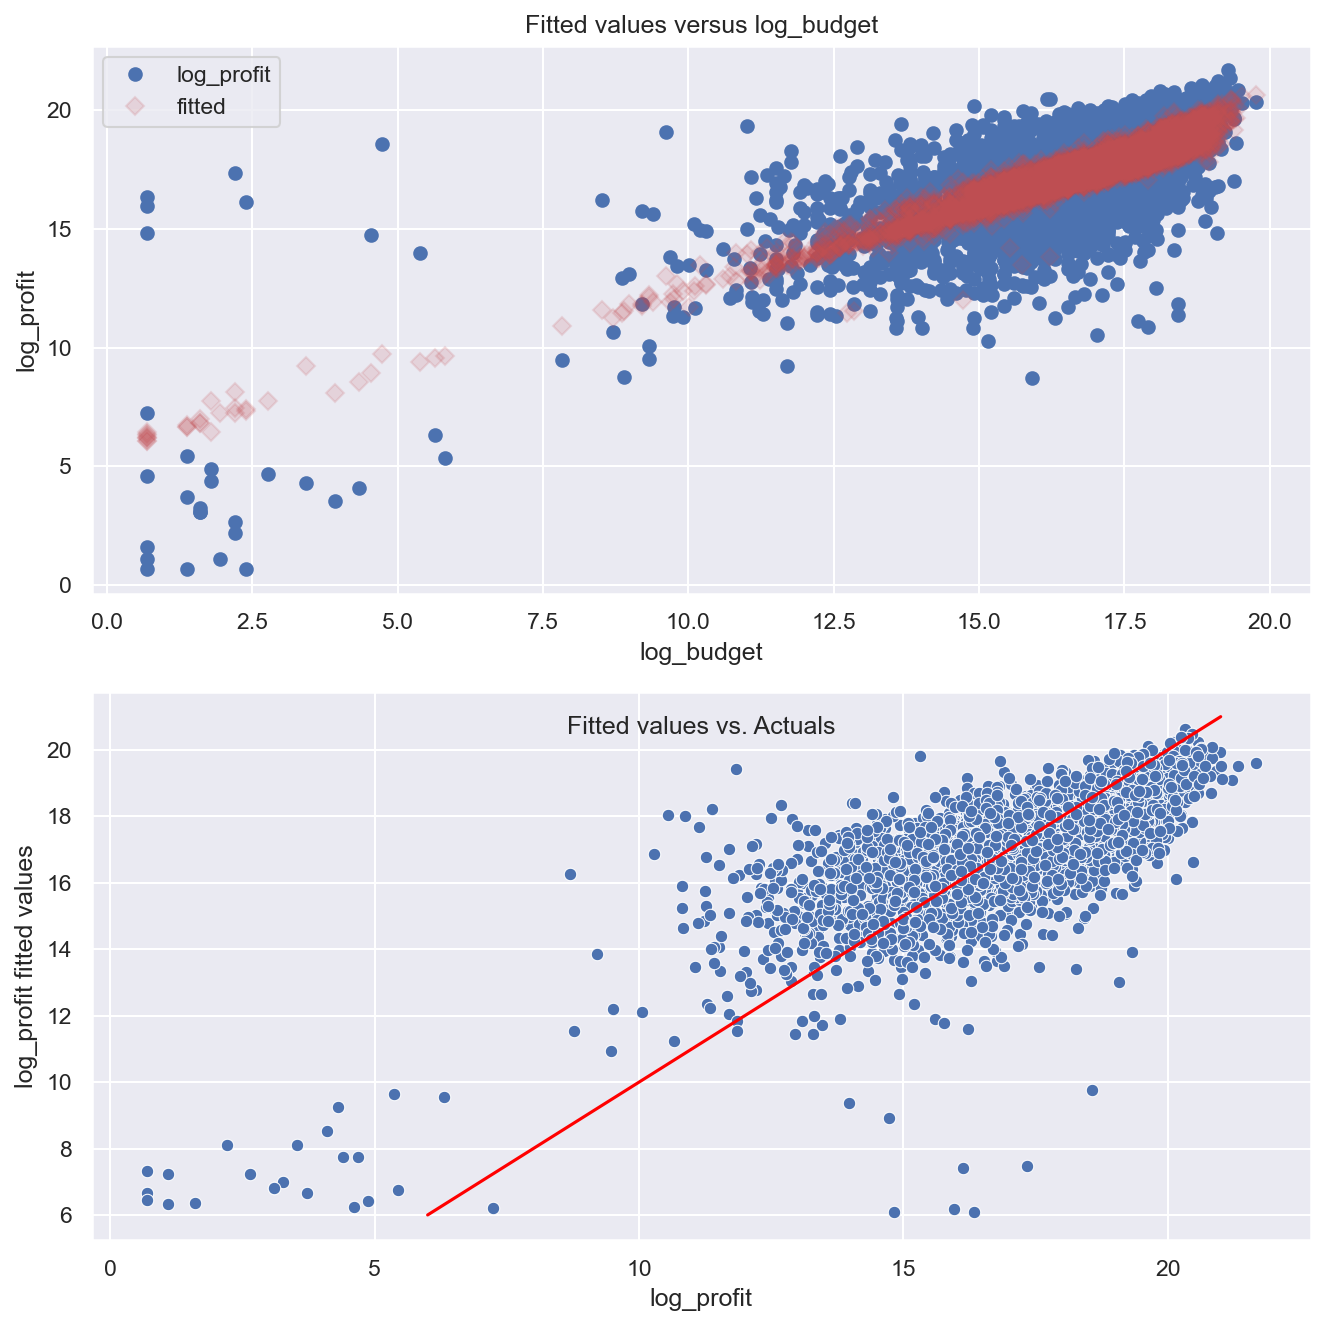

In [309]:
fig, (ax1, ax2) = plt.subplots(2,1,dpi=150,figsize=(9,9))
sns.set()
sm.graphics.plot_fit(est, 'log_budget', vlines=False,alpha=0.15, ax=ax1);
sns.scatterplot(x=y, y=est.fittedvalues, ax=ax2);
sns.lineplot(x=[6,21],y=[6,21],color='red', ax=ax2)
plt.tight_layout();
plt.ylabel('log_profit fitted values');
plt.title('Fitted values vs. Actuals',y=0.9);

# 2.2 Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [310]:
X_m = X.to_numpy(copy=True)
y_m = y.to_numpy(copy=True)
coef_manual = np.linalg.inv(X_m.transpose() @ X_m) @ X_m.transpose() @ y_m

In [311]:
compare_w_OLS = est.params.to_frame()
compare_w_OLS.columns = ['OLS']
compare_w_OLS['Manual'] = coef_manual
compare_w_OLS

,OLS,Manual
const,2.878090,2.878090
genre_Action,-0.159574,-0.159574
genre_Animation,0.437453,0.437453
genre_Crime,-0.184319,-0.184319
genre_Foreign,-0.805104,-0.805104
genre_ScienceFiction,-0.168707,-0.168707
genre_TVMovie,1.474580,1.474580
genre_Western,-0.467599,-0.467599
gencmb_ActAdvFan,0.636850,0.636850
gencmb_ActAdvSci,0.465821,0.465821


# 2.3 Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [312]:
from scipy.optimize import minimize

In [313]:
def OLS_Like_Reg(beta, X, y):
    # generate the B x X matrix
    #     a.k.a. the prediction
    yhat = beta @ np.transpose(X)
    
    # find the delta to the real values
    y_diff = yhat - np.transpose(y)
    
    # square and sum it to mimic the
    # square of the fibenious norm
    f_beta = np.sum( y_diff @ np.transpose(y_diff) )

    return f_beta


In [314]:
# create beta hat vector to maximize on
# will store the values of maximum likelihood beta parameters
# Arbitrarily initialized to all ones
bhat = (np.ones(len(X_m[0]))
        .reshape( (1,X_m.shape[1]) ))

# use Conjugate Gradient Descent method to find roots
OLS_est = minimize(OLS_Like_Reg, bhat, 
                   args=(X_m, y_m), 
                   method='CG',
                   options={'maxiter':500000, 
                           })
                            
#         - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
#         - 'Powell'      :ref:`(see here) <optimize.minimize-powell>`
#         - 'CG'          :ref:`(see here) <optimize.minimize-cg>`
#         - 'BFGS'        :ref:`(see here) <optimize.minimize-bfgs>`
#         - 'Newton-CG'   :ref:`(see here) <optimize.minimize-newtoncg>`
#         - 'L-BFGS-B'    :ref:`(see here) <optimize.minimize-lbfgsb>`
#         - 'TNC'         :ref:`(see here) <optimize.minimize-tnc>`
#         - 'COBYLA'      :ref:`(see here) <optimize.minimize-cobyla>`
#         - 'SLSQP'       :ref:`(see here) <optimize.minimize-slsqp>`
#         - 'trust-constr':ref:`(see here) <optimize.minimize-trustconstr>`
#         - 'dogleg'      :ref:`(see here) <optimize.minimize-dogleg>`
#         - 'trust-ncg'   :ref:`(see here) <optimize.minimize-trustncg>`
#         - 'trust-exact' :ref:`(see here) <optimize.minimize-trustexact>`
#         - 'trust-krylov' :ref:`(see here) <optimize.minimize-trustkrylov>`

#print vector of maximized betahats
compare_w_OLS['Scipy_CG'] = OLS_est['x']
compare_w_OLS

,OLS,Manual,Scipy_CG
const,2.878090,2.878090,2.878145
genre_Action,-0.159574,-0.159574,-0.159580
genre_Animation,0.437453,0.437453,0.437451
genre_Crime,-0.184319,-0.184319,-0.184318
genre_Foreign,-0.805104,-0.805104,-0.805126
genre_ScienceFiction,-0.168707,-0.168707,-0.168679
genre_TVMovie,1.474580,1.474580,1.464953
genre_Western,-0.467599,-0.467599,-0.467600
gencmb_ActAdvFan,0.636850,0.636850,0.636861
gencmb_ActAdvSci,0.465821,0.465821,0.465803


In [315]:
OLS_est.fun

7668.477333018493

# Let's build a custom gradient descent to run with scipy.optimize.minimize using the Wolfe conditions.
### Reference pages: 
### https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#custom-minimizers
### https://youtu.be/X4Pjd-1R-jI
### https://youtu.be/5upFcYJqSwo
### https://youtu.be/sXMi1D2E9QQ

In [316]:
# import the required object to be returned
# by the minimizer
from scipy.optimize import OptimizeResult

In [321]:
def gradiet_descent_diy(fun, B0, args=(), maxfev=None, 
                        maxiter=100, stepsize=0.001,
                        printit=0, alpha0=0.1, C1=0.001, C2=0.9,
                        callback=None, **options):
    """
    Function to create my own minimizer
    to be used by scipy.optimize.minimize.
    
    Inputs:
    fun: the function to be called for evaluation
    B0: the beta's to be optimized
    args: arguments that may be passed by scipy.optimize,
          in this case, the X and y matricies
    maxfev: max number of function evaluations to be made
    stepsize: (ill-named) delta to use for calculating tangents
    printit: flag to print debugging statements
    alpha0: proposed stepsize
    maxiter: maximum number of iterations to conduct
    C1: the factor for Wolfe's first condition
    C2: the factor for Wolfe's second condition
    callback: ???
    
    Outputs:
    as per requirements of the OptimizeResult object
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult
    """
    # initialize stuff
    iters = 0     # iterations
    fevs = 0      # function calls
    X, y = args   # matrices for funcion calls
    
    # tolerance to end iterations:
    # in this case, the delta fibenious norm
    # square change
    tol = 0.1
    
    # create first results
    B_best = np.copy(B0) # betas as provided

    improved = True

    # check if any limits reached
    while (iters <= maxiter) & (improved):
        
        iters += 1
        
        # loop through each beta to minimize
        for i in range(len(B_best)):
            if (printit):
                print(f"From B_best: {B_best[i]}")

            # make a copy of betas
            B_test = np.copy(B_best)
            Beta = B_test[i]
            if (printit):
                print(f"for Beta({i}) = {Beta:.5f}")
            
            # take an infinitesimal step in either 
            # direction from the current beta-value  
            # to establish the local tangent.
            fun_best = fun(B_best, X, y)
            if iters == 1:
                print(f"Starting minima: {fun_best:,.0f}")
            B_test[i] = Beta + stepsize # step right
            fun_rght = fun(B_test, X, y) # eval right
            B_test[i] = Beta - stepsize # step left
            fun_left = fun(B_test, X, y) # eval left
            # calculate slope
            df_dx_k = 0.5 * (fun_rght - fun_left) / stepsize
            if (printit):
                print(f"\tdf_dx_k: {df_dx_k}")
            fevs += 3
            
            # establish the direction (dir_k) 
            # to proceed into (either +1 or -1)
            # i.e. if tangent is -'ve we need to go right
            #      if tangent is +'ve we need to go left
            dir_k = np.sign(df_dx_k) * -1
            df_dx_k = abs(df_dx_k) # remove sign from tangent
            if (printit):
                print(f"\tdir_k: {dir_k}")
            
            # define limits for iterative stepsize
            alpha_left = np.copy(stepsize) # lower bound
            alpha_right = np.inf # upper bound
            alpha = np.copy(alpha0) # target stepsize
            
            # set both Wolfe's conditions to false
            C1_crit, C2_crit = (False, False)
            
            while (not C1_crit) | (not C2_crit):
                if (printit):
                    print(f"\talphas: {alpha_left}, {alpha}, {alpha_right}")
                #===========================
                # test for Wolfe Condition 1
                #===========================

                # assume this step in the direction 
                # of negative tangent
                # and calculate the function
                B_test[i] = Beta + alpha * dir_k
                fun_k_new = fun(B_test, X, y)
                if (printit):
                    print(f"\tTest Beta: {B_test[i]}, Fun: {fun_k_new}")
                fevs += 1

                # test the condition 1 (see references)
                if fun_k_new <= fun_best + alpha * dir_k * C1 * df_dx_k:
                    # PASSED:
                    if (printit):
                        print(f"\t\tC1 Passed")
                    C1_crit = True
                else:
                    if (printit):
                        print(f"\t\tC1 Failed")
                    # FAILED: step is too long
                    # make as new upper bound
                    alpha_right = np.copy(alpha) 
                    # new target is half-way point
                    # NOTE: half-way leads to some
                    #       issues which would require
                    #       a loop to satisfy C1, so
                    #       we use a weaker estimate
                    #       biased on the lower side.
                    #       Hence the alternative line.
#                    alpha = (alpha_left + alpha_right) / 2.
                    alpha = alpha_left * 1.1 # modification from method
                    C1_crit = False
                if (printit):
                    print(f"\t\talphas: {alpha_left}, {alpha}, {alpha_right}")


                #===========================
                # test for Wolfe Condition 2
                #===========================

                # get the tangent at the new candidate point
                # ABOUT Beta + alpha * dir_k !!
                #     go to point and step right
                B_test[i] = Beta + alpha * dir_k + stepsize
                fun_rght = fun(B_test, X, y)
                if (printit):
                    print(f"\tTest Beta: {B_test[i]}, Fun_rght: {fun_rght}")
                #     go to point and step left
                B_test[i] = Beta + alpha * dir_k - stepsize
                fun_left = fun(B_test, X, y)
                if (printit):
                    print(f"\tTest Beta: {B_test[i]}, Fun_left: {fun_left}")

                # no need to calculate the sign of this 
                # derivative for the upcoming inequality -
                # use as is.
                df_dx_kalf = 0.5 * (fun_rght - fun_left) / stepsize
                fevs += 2            

                # test for Condition 2
                if df_dx_kalf >= C2 * df_dx_k * dir_k:
                    # PASSED
                    if (printit):
                        print(f"\t\tC2 Passed")
                    C2_crit = True
                else:
                    # FAILED: step is too long
                    if (printit):
                        print(f"\t\tC2 Failed")
                    # if upper bound is still np.inf
                    # we need to devise a scheme to 
                    # increase the next guess
                    if alpha_right != np.inf:
#                        alpha_left = (alpha_left + alpha) / 2.
                        alpha_left = alpha_left * 1.1
                        alpha = (alpha_left + alpha_right) / 2.
                    else:
                        alpha *= 1.1 # arbitrary factor (see above)
                    C2_crit = False
                if (printit):
                    print(f"\t\talphas: {alpha_left}, {alpha}, {alpha_right}")

                iters += 1
                                
                if (maxfev is not None and fevs > maxfev) | (iters > maxiter):
                    break
                if (alpha_right - alpha_left) < stepsize:
                    break
                
            if (alpha_right - alpha_left) < stepsize:
                break
            B_test[i] = Beta + alpha * dir_k
            fun_k_new = fun(B_test, X, y)
            fevs += 1
            if (printit):
                print(f"\tNew Beta value: {B_test[i]}, Fun_new: {fun_k_new}")

            # is it better?
            if fun_k_new < fun_best:
                B_best = np.copy(B_test)
                fun_best = np.copy(fun_k_new)
                improved = True
            else:
                improved = False
                break
            
    print(f"Ending minima: {fun_best:,.0f}")
    print(f"Number of iterations: {iters:,.0f}")
    print(f"Number of function calls: {fevs:,.0f}")
            
    return OptimizeResult(fun=fun_best, x=B_best, nit=iters,
                          nfev=fevs, success=(iters > 1)) 
    

In [341]:
bhat = np.ones( X_m.shape[1] )

# use Custom Gradient Descent method to find roots
My_OLS_est = minimize(OLS_Like_Reg, bhat, 
                      args=(X_m, y_m), 
                      method=gradiet_descent_diy,
                      options={'maxiter':15000, 
                               'stepsize':0.0001,
                               'alpha0':0.3,
                               'printit':0,
                               'C1':0.0001,
                               'C2':0.6
                              })

Starting minima: 146,352
Ending minima: 7,671
Number of iterations: 15,002
Number of function calls: 60,117


In [342]:
compare_w_OLS['My_GradD'] = My_OLS_est['x']
compare_w_OLS

,OLS,Manual,Scipy_CG,My_GradD
const,2.878090,2.878090,2.878145,2.526297
genre_Action,-0.159574,-0.159574,-0.159580,-0.172826
genre_Animation,0.437453,0.437453,0.437451,0.434532
genre_Crime,-0.184319,-0.184319,-0.184318,-0.185616
genre_Foreign,-0.805104,-0.805104,-0.805126,-0.690425
genre_ScienceFiction,-0.168707,-0.168707,-0.168679,-0.177383
genre_TVMovie,1.474580,1.474580,1.464953,1.624676
genre_Western,-0.467599,-0.467599,-0.467600,-0.465403
gencmb_ActAdvFan,0.636850,0.636850,0.636861,0.609931
gencmb_ActAdvSci,0.465821,0.465821,0.465803,0.481265


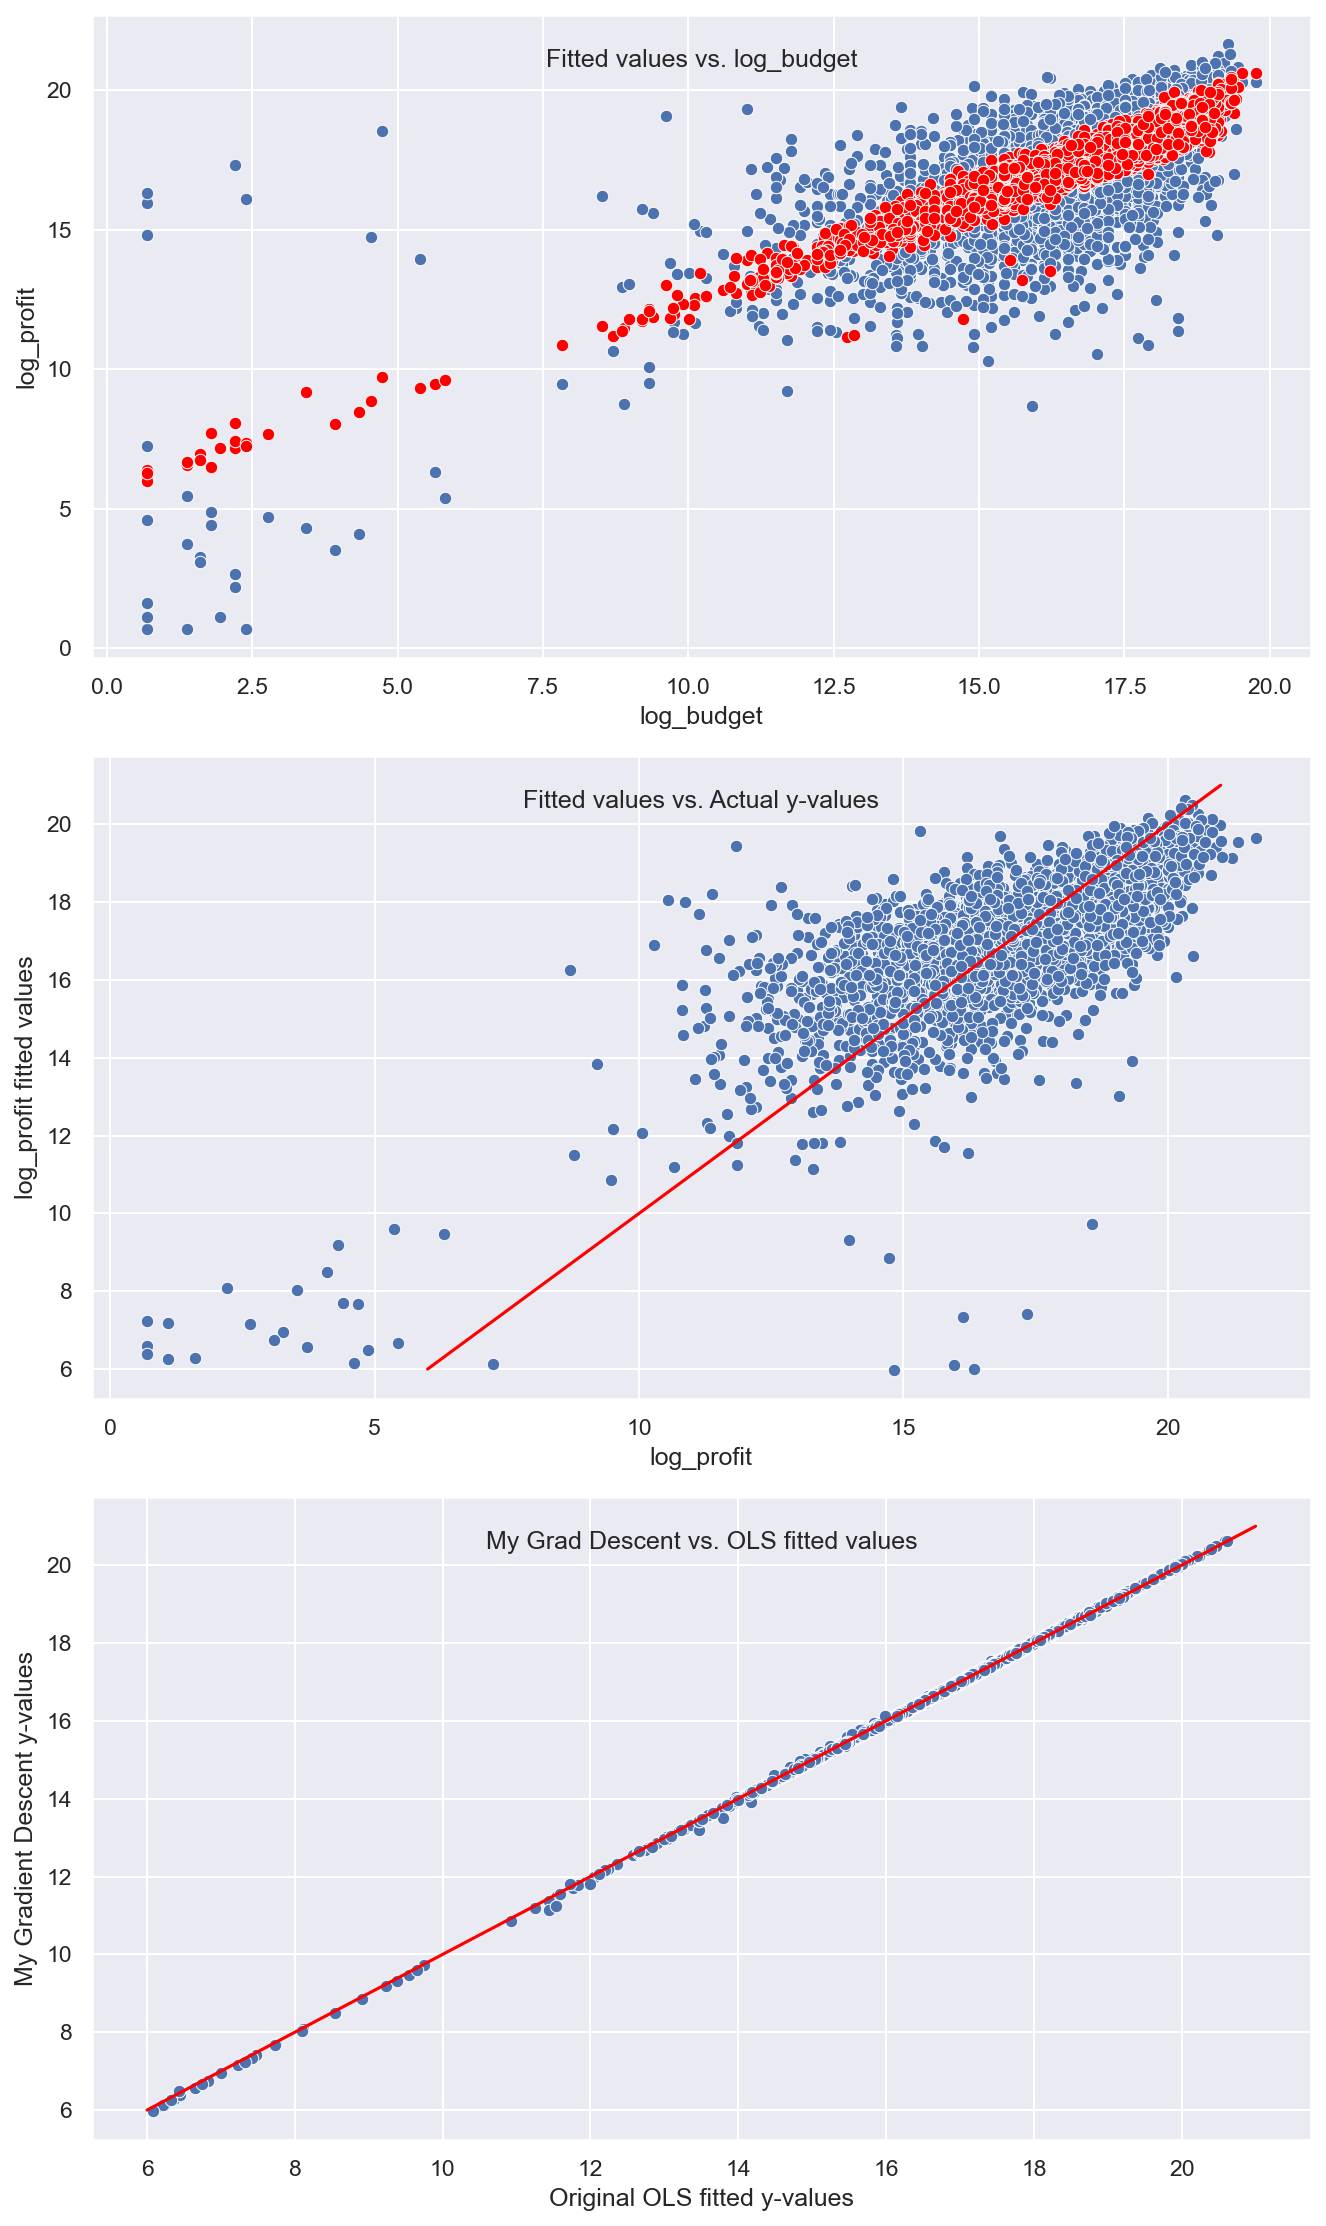

In [343]:
Y_fitted = X_m @ My_OLS_est['x'].reshape(14,1)
Y_fitted = Y_fitted.reshape(3755,)

fig, (ax1, ax2, ax3) = plt.subplots(3,1,dpi=150,figsize=(9,15))
sns.set()

# plot new fit over original data
sns.scatterplot(x=X['log_budget'], y=y, ax=ax1);
sns.scatterplot(x=X['log_budget'], y=Y_fitted, color='red', ax=ax1);
ax1.set_title('Fitted values vs. log_budget',y=0.9);

# plot new fit against original y-values
sns.scatterplot(x=y, y=Y_fitted, ax=ax2);
sns.lineplot(x=[6,21],y=[6,21],color='red', ax=ax2)
ax2.set_ylabel('log_profit fitted values');
ax2.set_title('Fitted values vs. Actual y-values',y=0.9);

# plot new fit against OLS fitted values
sns.scatterplot(x=est.fittedvalues, y=Y_fitted, ax=ax3);
sns.lineplot(x=[6,21],y=[6,21],color='red', ax=ax3)
ax3.set_title('My Grad Descent vs. OLS fitted values',y=0.9);
ax3.set_xlabel('Original OLS fitted y-values')
ax3.set_ylabel('My Gradient Descent y-values')
plt.tight_layout();


# Conclusion: The iterative bounds calculation for alpha_left had to be modified to achieve a stable result. But this only for given inputs. Although a good fit was achieved with this custom method, it is too sensitive to the inputs and not robust.